# Netflix title analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
df = pd.DataFrame(pd.read_csv('../resources/netflix_titles.csv'))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Exploration

Text(0, 0.5, 'Number of titles')

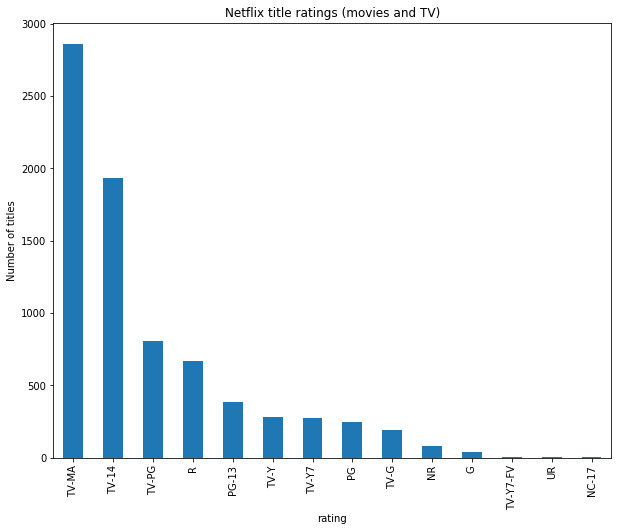

In [3]:
df.groupby('rating').size().sort_values(ascending=False)\
    .plot.bar(figsize=(10,8), title='Netflix title ratings (movies and TV)')
plt.ylabel('Number of titles')
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

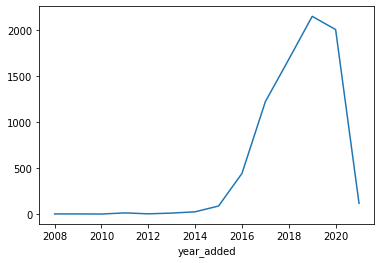

In [4]:
df['year_added'] = df.date_added.str[-4:]
df.groupby('year_added').size().plot.line()

In [5]:
movie_df = df.loc[df.type=='Movie']
us_movie_df = movie_df.loc[movie_df.country=='United States']

tv_df = df.loc[df.type=='TV Show']
us_tv_df = tv_df.loc[tv_df.country=='United States']

us_df = tv_df.loc[df.country=='United States']

Text(0, 0.5, 'Number of titles')

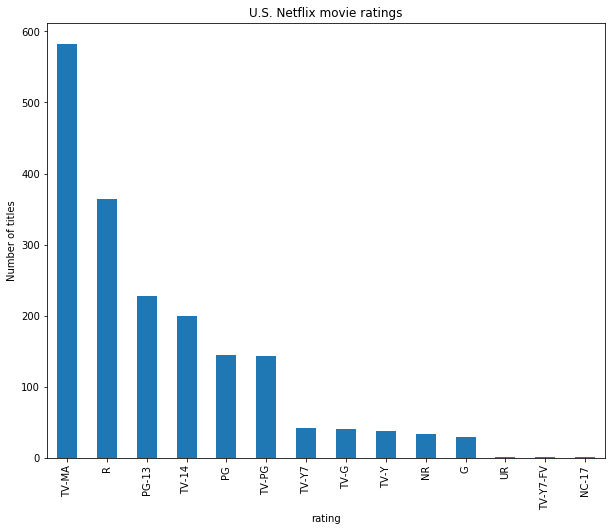

In [6]:
us_movie_df.groupby('rating').size().sort_values(ascending=False)\
    .plot.bar(figsize=(10,8), title='U.S. Netflix movie ratings')
plt.ylabel('Number of titles')
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

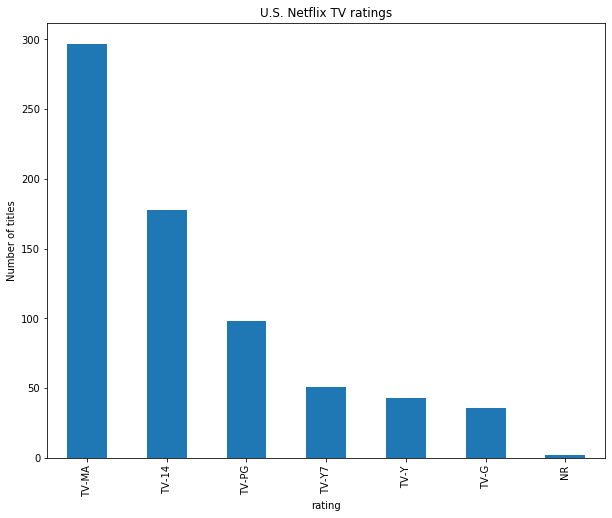

In [7]:
us_tv_df.groupby('rating').size().sort_values(ascending=False)\
    .plot.bar(figsize=(10,8), title='U.S. Netflix TV ratings')
plt.ylabel('Number of titles')
COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

Text(0, 0.5, 'Number of titles')

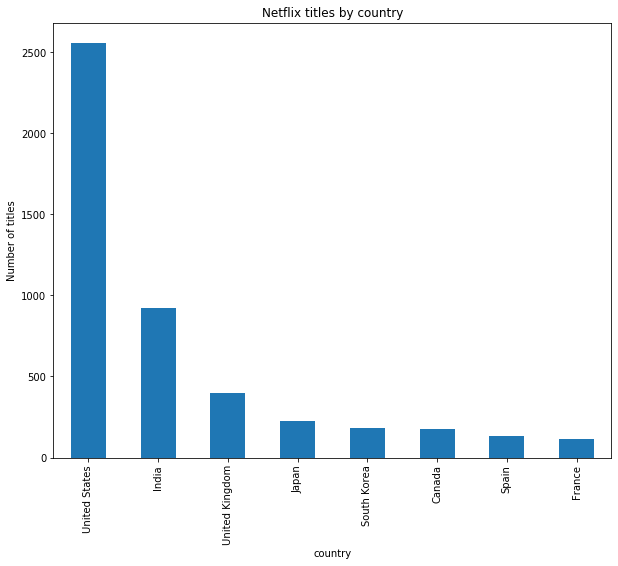

In [8]:
df.groupby('country').size().sort_values(ascending=False)[:8]\
    .plot.bar(figsize=(10,8), title='Netflix titles by country')
plt.ylabel('Number of titles')
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

Text(0, 0.5, 'Number of titles')

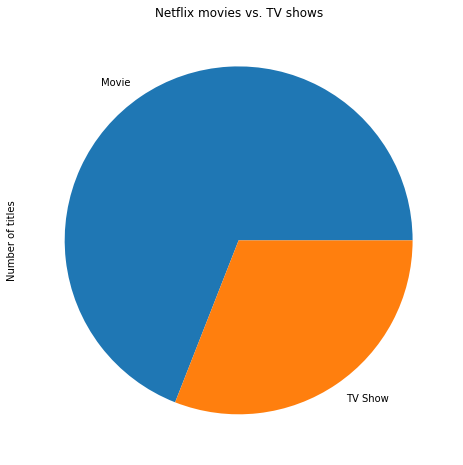

In [9]:
df.groupby('type').size().sort_values(ascending=False)\
    .plot.pie(figsize=(10,8), title='Netflix movies vs. TV shows')
plt.ylabel('Number of titles')
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

[None, None, None, None]

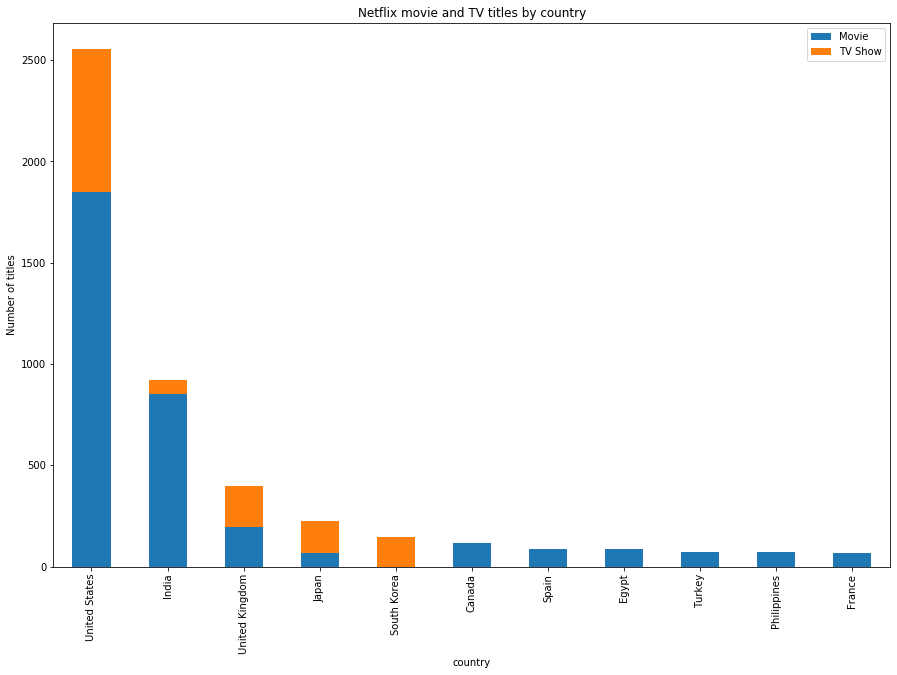

In [10]:
df.groupby(['country','type'], as_index=False).size()\
    .sort_values(ascending=False)[:15].unstack()\
    .plot.bar(stacked=True, figsize=(15,10), title='Netflix movie and TV titles by country')

plt.ylabel('Number of titles')

# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

legend = plt.legend()
plt.setp(legend.get_texts(), color='black')

[None, None, None, None]

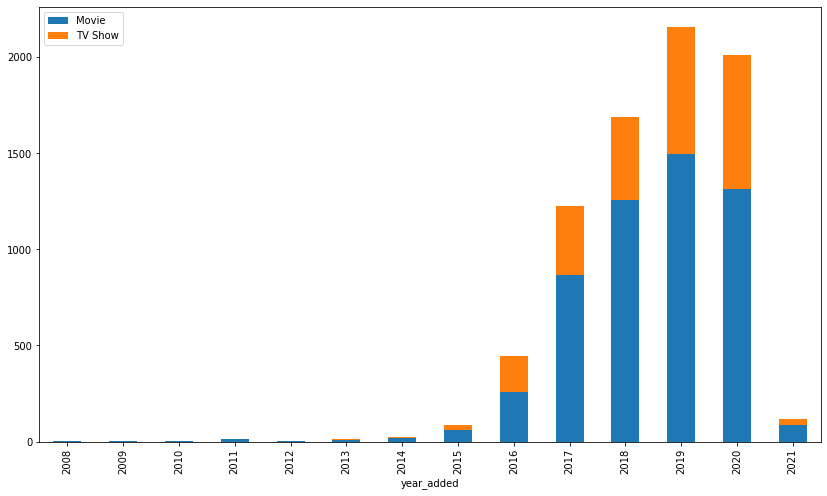

In [11]:
df.groupby(['year_added','type'], as_index=False).size()\
    .sort_values(ascending=False).unstack()\
    .plot.bar(stacked=True, figsize=(14,8))

legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color='black')

[None, None, None, None]

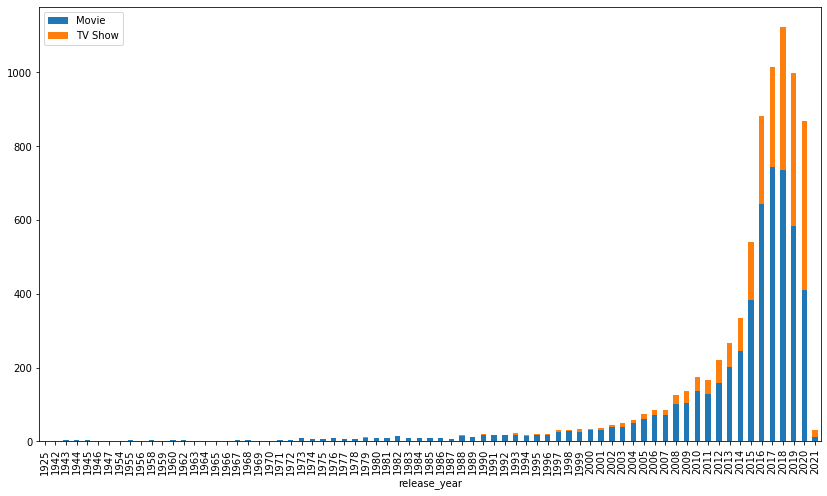

In [12]:
df.groupby(['release_year','type'], as_index=False).size()\
    .sort_values(ascending=False).unstack()\
    .plot.bar(stacked=True, figsize=(14,8))

legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color='black')

Text(0, 0.5, 'Duration')

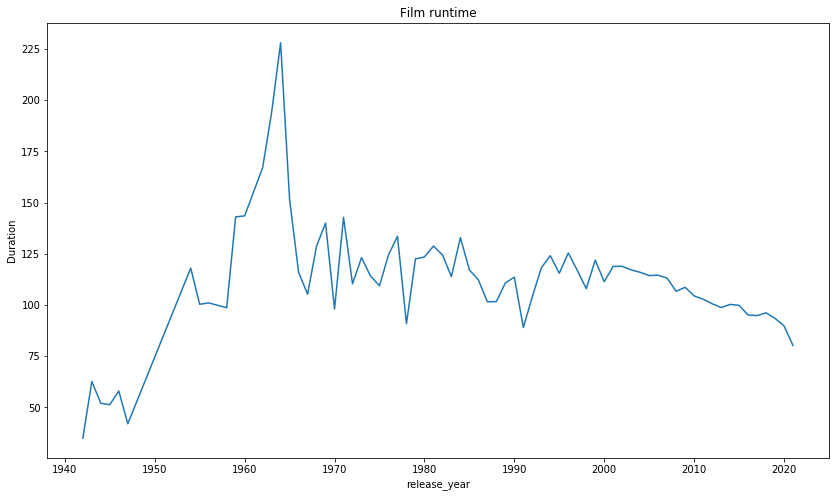

In [13]:
movie_df['duration'] = movie_df['duration'].str.split(' ').str[0].astype('int')
movie_df.groupby('release_year')['duration'].mean()\
    .plot.line(figsize=(14,8), title='Film runtime')
plt.ylabel('Duration')

Text(0, 0.5, 'Season')

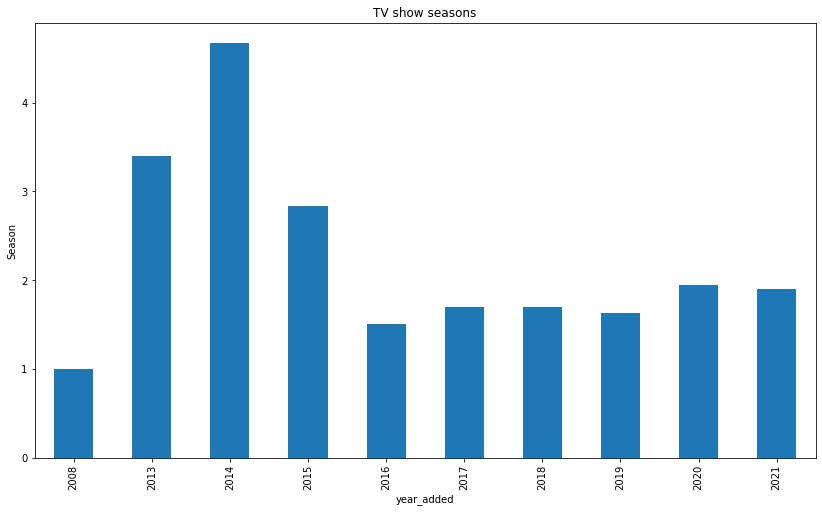

In [14]:
tv_df['duration'] = tv_df['duration'].str.split(' ').str[0].astype('int')
tv_df.groupby('year_added')['duration'].mean()\
    .plot.bar(figsize=(14,8), title='TV show seasons')
plt.ylabel('Season')

In [15]:
lists_of_cast = us_df.cast.str.split(', ').dropna(how='any').to_list()
all_actors = [item for sublist in lists_of_cast for item in sublist]

cast_counter = {}
for actor in all_actors:
    if actor in cast_counter:
        cast_counter[actor] += 1
    else:
        cast_counter[actor] = 1

actor_df = pd.DataFrame.from_dict(data=cast_counter, orient='index')\
    .reset_index().rename(columns={'index':'actor',0:'titles'})\
    .sort_values(by='titles',ascending=False).reset_index(drop=True)

actor_df[:20]

,actor,titles
0,Mike Colter,7
1,Kevin Michael Richardson,6
2,Steven Yeun,6
3,Grey DeLisle,5
4,Fortune Feimster,5
5,Sean Astin,5
6,Grey Griffin,5
7,Kari Wahlgren,5
8,Keith David,5
9,Kate Walsh,5


In [16]:
top_actor = actor_df.iloc[0]['actor']

us_df['cast'] = us_df['cast'].fillna(' ')
actor_df = us_df.loc[us_df.cast.str.contains(top_actor)]

print(f'The most prolific actor on Netfilx in the U.S. is {top_actor}, \
appearing in {len(actor_df)} titles:')

for title in actor_df.title.to_list():
    print(title)

The most prolific actor on Netfilx in the U.S. is Mike Colter, appearing in 7 titles:
Evil
Marvel's Jessica Jones
Marvel's Luke Cage
Marvel's The Defenders
Seis Manos
Social Distance
Tiny Creatures
